In [4]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [6]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

#转换矩阵
x_train = x_train_image.reshape(x_train_image.shape[0], 28, 28, 1).astype('float32')
x_test = x_test_image.reshape(x_test_image.shape[0], 28, 28, 1).astype('float32')

#标准化
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

#执行one-hot encoding转换
y_train_one_hot = np_utils.to_categorical(y_train_label)
y_test_one_hot = np_utils.to_categorical(y_test_label)

In [12]:
model = Sequential()
#建立卷积层1和池化层1
#输入图片大小28*28，执行1次，产生16张小图片，卷积运算不改变图片大小
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
#执行第1次缩减，将16个28*28的图片缩小成16个14*14的 
model.add(MaxPooling2D(pool_size=(2,2)))

#建立卷积层2和池化层2
#将原本16张小图片，转换成36个，卷积运算不改变图片大小
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
#执行第2次缩减，将36个14*14的图片缩小成36个7*7的
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
#全连接层
#将输入“压平”,即把多维的输入一维化,常用在从卷积层到全连接层的过渡
#将之前建立的池化层2转换成1维向量，长度是36*7*7=1764
model.add(Flatten())
#隐藏层
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [13]:
#定义训练方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#开始训练
train_history = model.fit(x=x_train_normalize, y=y_train_one_hot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
95s - loss: 0.5492 - acc: 0.8282 - val_loss: 0.1061 - val_acc: 0.9682
Epoch 2/10
86s - loss: 0.1642 - acc: 0.9501 - val_loss: 0.0746 - val_acc: 0.9778
Epoch 3/10
94s - loss: 0.1203 - acc: 0.9638 - val_loss: 0.0552 - val_acc: 0.9821
Epoch 4/10
86s - loss: 0.0969 - acc: 0.9704 - val_loss: 0.0482 - val_acc: 0.9856
Epoch 5/10
77s - loss: 0.0855 - acc: 0.9745 - val_loss: 0.0425 - val_acc: 0.9871
Epoch 6/10
77s - loss: 0.0765 - acc: 0.9770 - val_loss: 0.0395 - val_acc: 0.9882
Epoch 7/10
77s - loss: 0.0672 - acc: 0.9796 - val_loss: 0.0393 - val_acc: 0.9880
Epoch 8/10
77s - loss: 0.0638 - acc: 0.9806 - val_loss: 0.0349 - val_acc: 0.9900
Epoch 9/10
77s - loss: 0.0596 - acc: 0.9821 - val_loss: 0.0334 - val_acc: 0.9904
Epoch 10/10
81s - loss: 0.0565 - acc: 0.9828 - val_loss: 0.0340 - val_acc: 0.9899


In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
#查看数字图像，，真实的数据及预测结果
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if(len(prediction) > 0):
            title += ", predict=" + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()

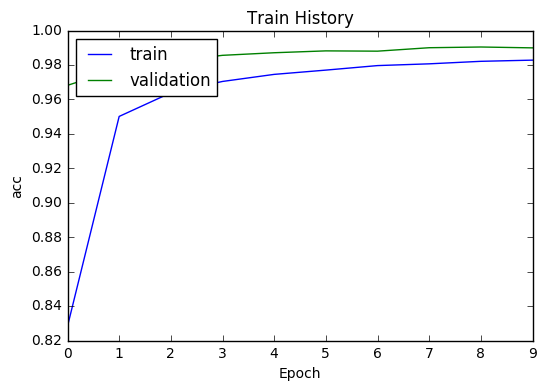

In [15]:
show_train_history(train_history, 'acc', 'val_acc')

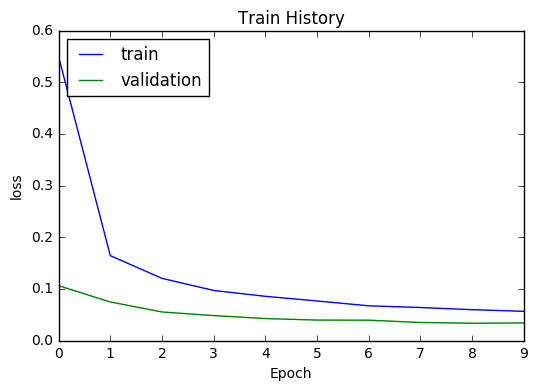

In [16]:
show_train_history(train_history, 'loss', 'val_loss')

In [17]:
#评估模型准确率
score = model.evaluate(x_test_normalize, y_test_one_hot)
print()
print('accuracy=', score[1])

 9984/10000 [============================>.] - ETA: 0s
accuracy= 0.9915


In [19]:
pred = model.predict_classes(x_test_normalize)
pred

 9984/10000 [============================>.] - ETA: 0s

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

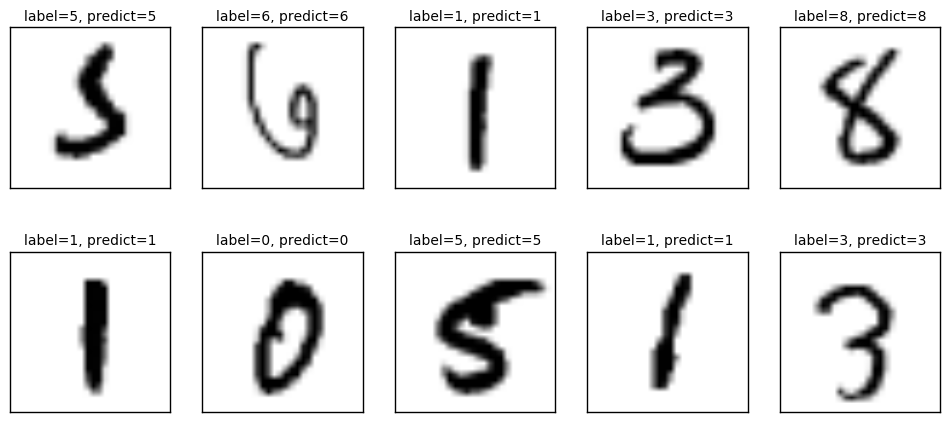

In [20]:
plot_images_labels_prediction(x_test_image, y_test_label, pred, idx=340)

In [21]:
import pandas as pd
pd.crosstab(y_test_label, pred, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,1,0,0,0,3,1,0,0
1,0,1130,2,0,0,0,1,1,1,0
2,1,0,1026,0,1,0,0,3,1,0
3,0,0,1,1004,0,1,0,2,2,0
4,0,0,0,0,977,0,1,0,1,3
5,1,0,0,5,0,882,2,1,0,1
6,1,1,0,0,1,1,954,0,0,0
7,0,1,4,2,0,0,0,1020,1,0
8,1,0,3,2,0,1,3,4,956,4
